In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Dataset Shape: (150, 5)

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


<Figure size 1200x800 with 0 Axes>

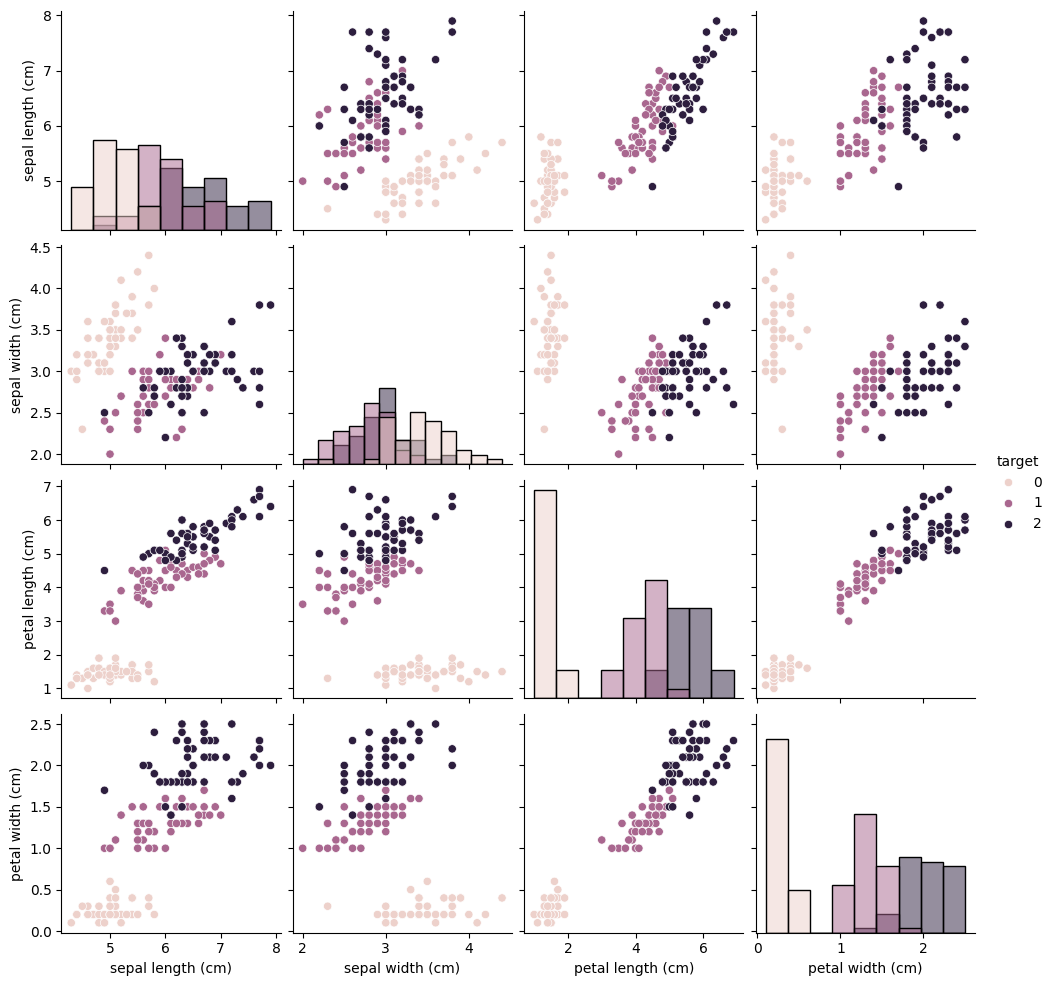

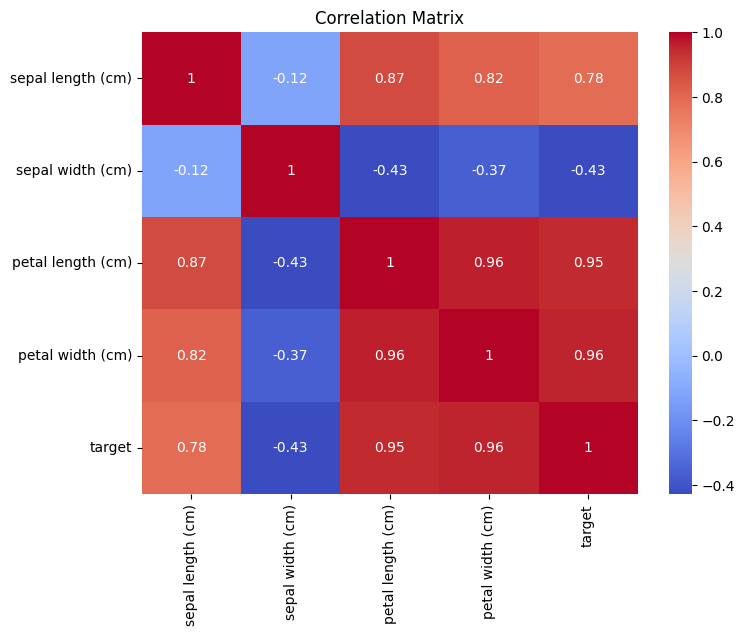

In [6]:
print("Dataset Shape:", df.shape)
print("\nBasic Statistics:")
print(df.describe())

plt.figure(figsize=(12, 8))

# Pairplot
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()

# Correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Univariate Feature Selection:
Selected features: ['petal length (cm)', 'petal width (cm)']
Feature scores: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]

Random Forest Feature Importance:
sepal length (cm): 0.1061
sepal width (cm): 0.0217
petal length (cm): 0.4361
petal width (cm): 0.4361


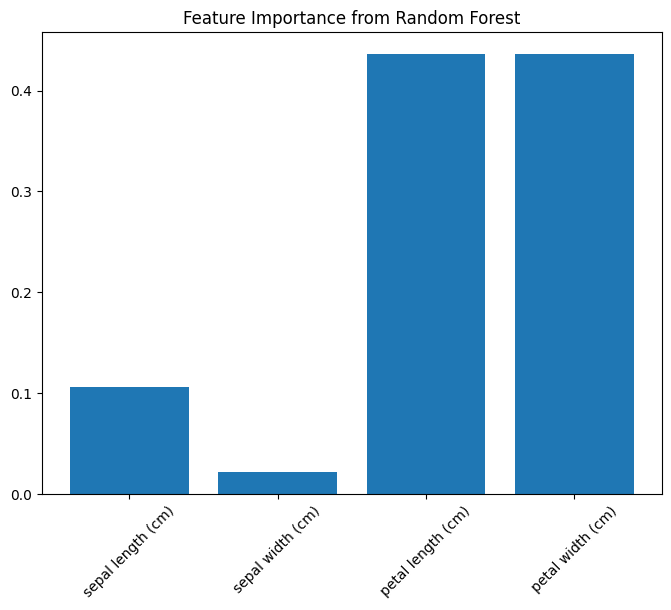


RFE Feature Ranking:
sepal length (cm): ranking=3
sepal width (cm): ranking=2
petal length (cm): ranking=1
petal width (cm): ranking=1


In [7]:
#Feature Selection Techniques

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# a. Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)
selected_features = selector.get_support()
print("\nUnivariate Feature Selection:")
print("Selected features:", [iris.feature_names[i] for i in range(len(selected_features)) if selected_features[i]])
print("Feature scores:", selector.scores_)

# b. Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importance = rf.feature_importances_
print("\nRandom Forest Feature Importance:")
for name, importance in zip(iris.feature_names, feature_importance):
    print(f"{name}: {importance:.4f}")

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(iris.feature_names, feature_importance)
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=45)
plt.show()

# c. Recursive Feature Elimination with SVM
svm = SVC(kernel='linear')
rfe = RFE(estimator=svm, n_features_to_select=2)
rfe = rfe.fit(X_scaled, y)
print("\nRFE Feature Ranking:")
for i in range(X.shape[1]):
    print(f"{iris.feature_names[i]}: ranking={rfe.ranking_[i]}")

In [8]:
def evaluate_model(X_train, X_test, y_train, y_test, model_name):
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))
    return accuracy

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Before feature selection
base_accuracy = evaluate_model(X_train_scaled, X_test_scaled, y_train, y_test, "Base Model")

#  univariate feature selection
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
uni_accuracy = evaluate_model(X_train_selected, X_test_selected, y_train, y_test, "Univariate Selection")

# RFE
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)
rfe_accuracy = evaluate_model(X_train_rfe, X_test_rfe, y_train, y_test, "RFE Selection")

# e. Compare results
print("\nPerformance Comparison:")
print(f"Base Model Accuracy: {base_accuracy:.4f}")
print(f"Univariate Selection Accuracy: {uni_accuracy:.4f}")
print(f"RFE Selection Accuracy: {rfe_accuracy:.4f}")


Base Model Performance:
Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.89      0.94         9
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


Univariate Selection Performance:
Accuracy: 0.9667
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.89      0.94         9
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30


RFE Selection Performance:
Accuracy: 0.9667
Classification Report:
              precision    rec